In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import jenkspy
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

In [2]:
df_raw = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows.csv')
df_raw

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,695ea899a18c6d2f90c8b2f6c9b70bdf,3232268540,192.168.128.252,137,172.16.255.186,137,17,9,702,78,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS
2704835,f8188e4364129e635fe032a3bda206ea,3232268540,192.168.128.252,138,172.16.255.185,138,17,3,687,229,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS
2704836,4deda0130e2054781655cb4bd4cb580d,3232268540,192.168.128.252,138,172.16.255.186,138,17,3,687,229,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS
2704837,8c07a45c0c48648ff56341d7a065b855,3232268540,192.168.128.252,49879,108.177.11.188,5228,6,75,3520,40,...,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,2,Web,Unknown,Google


In [3]:
# df=df_raw

In [4]:
df,extra=train_test_split(df_raw,test_size=0.4,random_state=7)
df

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
485820,c4b9bdc59e830761c96751d692d1d911,3232267683,192.168.125.163,51987,13.33.57.24,443,6,16,7060,40,...,1.556031e+09,1.554475e+12,0.000010,0.127698,0.025925,0.043316,3,Web,TLS,Amazon
757563,ed1745dd1c3c122ee2cb7295df01d94a,3232266530,192.168.121.34,49651,172.217.1.106,443,6,35,8698,40,...,1.556139e+09,1.554583e+12,0.000003,45.005459,2.899563,10.163238,2,Web,TLS,Google
1438482,a2549b70973158b6878d759d46b9f837,3232268050,192.168.127.18,63699,172.217.15.202,443,6,30,9299,40,...,1.556312e+09,1.554756e+12,0.000055,16.120184,1.033911,3.895736,3,Web,TLS,Google
2513323,5887adef4b32b0b5578a17f646a94df5,3232268463,192.168.128.175,58474,185.213.26.143,123,17,2,152,76,...,1.559683e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,System,Unknown,NTP
2002089,d53ba4653bbb5fa6062461c8e6e8e795,3232266807,192.168.122.55,49268,172.16.255.200,53,17,2,162,73,...,1.559654e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Web,DNS,Google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934684,254c16c1aa5f220029daefff4c72bae8,3232266561,192.168.121.65,64189,192.168.1.255,1688,6,3,156,52,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Unspecified,Unknown,Unknown
2176615,99742e55382353f5171daf975f69315a,3232267706,192.168.125.186,55326,192.168.100.3,7680,6,3,156,52,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Unspecified,Unknown,Unknown
2632182,28afa20d71a29584a26850bbe9d07997,3232268073,192.168.127.41,58831,23.201.103.41,80,6,1,40,40,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Web,Unknown,HTTP
2671129,974ab8a9d0f66953da0cff6d102885e9,3232268375,192.168.128.87,49376,216.105.38.13,80,6,7,304,40,...,1.559765e+09,1.558205e+12,6.928293,10.274793,8.601543,1.673250,3,Web,Unknown,HTTP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622903 entries, 485820 to 585903
Data columns (total 50 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   flow_key              1622903 non-null  object 
 1   src_ip_numeric        1622903 non-null  int64  
 2   src_ip                1622903 non-null  object 
 3   src_port              1622903 non-null  int64  
 4   dst_ip                1622903 non-null  object 
 5   dst_port              1622903 non-null  int64  
 6   proto                 1622903 non-null  int64  
 7   pktTotalCount         1622903 non-null  int64  
 8   octetTotalCount       1622903 non-null  int64  
 9   min_ps                1622903 non-null  int64  
 10  max_ps                1622903 non-null  int64  
 11  avg_ps                1622903 non-null  float64
 12  std_dev_ps            1622903 non-null  float64
 13  flowStart             1622903 non-null  float64
 14  flowEnd               1622903 

In [6]:

df[['proto','pktTotalCount', 
    'octetTotalCount', 'min_ps', 'max_ps']] = df[['proto','pktTotalCount', 
                                                  'octetTotalCount', 'min_ps', 'max_ps']].astype('int32')
df[['avg_ps','std_dev_ps', 
    'flowStart', 'flowEnd', 'flowDuration',
   'min_piat','max_piat','avg_piat','std_dev_piat']] = df[['avg_ps','std_dev_ps', 
                                                             'flowStart', 'flowEnd', 'flowDuration',
                                                             'min_piat','max_piat','avg_piat',
                                                             'std_dev_piat']].astype('float32')
df[['f_pktTotalCount','f_octetTotalCount', 
    'f_min_ps', 'f_max_ps', 'b_pktTotalCount']] = df[['f_pktTotalCount','f_octetTotalCount', 
                                                      'f_min_ps', 'f_max_ps', 'b_pktTotalCount']].astype('int32')
df[['f_avg_ps','f_std_dev_ps', 
    'f_flowStart', 'f_flowEnd', 'f_flowDuration']] = df[['f_avg_ps','f_std_dev_ps', 
                                                         'f_flowStart', 'f_flowEnd', 'f_flowDuration']].astype('float32')
df[['f_min_piat','f_max_piat', 
    'f_avg_piat', 'f_std_dev_piat', 'b_avg_ps']] = df[['f_min_piat','f_max_piat', 
                                                       'f_avg_piat', 'f_std_dev_piat', 'b_avg_ps']].astype('float32')
df[['f_min_piat','f_max_piat', 
    'f_avg_piat', 'f_std_dev_piat', 'b_avg_ps']] = df[['f_min_piat','f_max_piat', 
                                                       'f_avg_piat', 'f_std_dev_piat', 'b_avg_ps']].astype('float32')
df[['b_std_dev_ps','b_flowStart', 
    'b_flowEnd', 'b_flowDuration', 'b_min_piat'
   ,'b_max_piat','b_avg_piat','b_std_dev_piat']] = df[['b_std_dev_ps','b_flowStart', 
                                                       'b_flowEnd', 'b_flowDuration',
                                                       'b_min_piat','b_max_piat','b_avg_piat',
                                                       'b_std_dev_piat']].astype('float32')
df[['b_octetTotalCount','b_min_ps', 
    'b_max_ps', 'flowEndReason']] = df[['b_octetTotalCount','b_min_ps', 
                                        'b_max_ps', 'flowEndReason']].astype('int32')

df.info()

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622903 entries, 485820 to 585903
Data columns (total 50 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   flow_key              1622903 non-null  object 
 1   src_ip_numeric        1622903 non-null  int64  
 2   src_ip                1622903 non-null  object 
 3   src_port              1622903 non-null  int64  
 4   dst_ip                1622903 non-null  object 
 5   dst_port              1622903 non-null  int64  
 6   proto                 1622903 non-null  int32  
 7   pktTotalCount         1622903 non-null  int32  
 8   octetTotalCount       1622903 non-null  int32  
 9   min_ps                1622903 non-null  int32  
 10  max_ps                1622903 non-null  int32  
 11  avg_ps                1622903 non-null  float32
 12  std_dev_ps            1622903 non-null  float32
 13  flowStart             1622903 non-null  float32
 14  flowEnd               1622903 

In [7]:
for i in df.columns:
    print('for ',i,':\nsum of Zeros:\n',df[i].eq(0).sum(),"\nsum of MISSES:\n",df[i].eq("MISS").sum()+df[i].eq("?").sum()+df[i].eq("\'\'").sum()+df[i].eq("Unknown").sum()+df[i].eq("Unspecified").sum(),"\n")

for  flow_key :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  src_ip_numeric :
sum of Zeros:
 0 
sum of MISSES:
 0 



C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


for  src_ip :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  src_port :
sum of Zeros:
 4455 
sum of MISSES:
 0 

for  dst_ip :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  dst_port :
sum of Zeros:
 4549 
sum of MISSES:
 0 

for  proto :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  pktTotalCount :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  octetTotalCount :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  min_ps :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  max_ps :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  avg_ps :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  std_dev_ps :
sum of Zeros:
 227984 
sum of MISSES:
 0 

for  flowStart :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  flowEnd :
sum of Zeros:
 0 
sum of MISSES:
 0 

for  flowDuration :
sum of Zeros:
 103015 
sum of MISSES:
 0 

for  min_piat :
sum of Zeros:
 105390 
sum of MISSES:
 0 

for  max_piat :
sum of Zeros:
 103015 
sum of MISSES:
 0 

for  avg_piat :
sum of Zeros:
 103015 
sum of MISSES:
 0 

for  std_dev_piat :
sum of Zeros:
 769854 
sum

In [8]:
df[( df["std_dev_ps"] == 0)]["avg_ps"].value_counts()

40.0     59074
52.0     48618
29.0     14707
48.0     13703
132.0    10528
         ...  
547.0        1
444.0        1
215.0        1
326.0        1
624.0        1
Name: avg_ps, Length: 461, dtype: int64

In [9]:
df["flowDuration"].value_counts()

0.000000     103015
0.000041       1945
0.000042       1558
0.000040       1467
0.000039        973
              ...  
0.152618          1
0.742184          1
11.874900         1
11.874858         1
15.341621         1
Name: flowDuration, Length: 883828, dtype: int64

In [10]:
df.groupby(['web_service']).count()[35:60]

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol
web_service,,,,,,,,,,,,,,,,,,,,,
GoogleServices,52325,52325,52325,52325,52325,52325,52325,52325,52325,52325,...,52325,52325,52325,52325,52325,52325,52325,52325,52325,52325
H323,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
HTTP,91497,91497,91497,91497,91497,91497,91497,91497,91497,91497,...,91497,91497,91497,91497,91497,91497,91497,91497,91497,91497
HTTP_Proxy,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320,...,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320
HotspotShield,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
IAX,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
ICMP,4455,4455,4455,4455,4455,4455,4455,4455,4455,4455,...,4455,4455,4455,4455,4455,4455,4455,4455,4455,4455
IMAPS,717,717,717,717,717,717,717,717,717,717,...,717,717,717,717,717,717,717,717,717,717
IMO,13691,13691,13691,13691,13691,13691,13691,13691,13691,13691,...,13691,13691,13691,13691,13691,13691,13691,13691,13691,13691


In [11]:
df.groupby(['application_protocol']).count()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,web_service
application_protocol,,,,,,,,,,,,,,,,,,,,,
ApplePush,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
BitTorrent,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
DNS,293223,293223,293223,293223,293223,293223,293223,293223,293223,293223,...,293223,293223,293223,293223,293223,293223,293223,293223,293223,293223
FacebookZero,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Git,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
HTTP,77206,77206,77206,77206,77206,77206,77206,77206,77206,77206,...,77206,77206,77206,77206,77206,77206,77206,77206,77206,77206
HTTP_Proxy,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
IMAPS,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,...,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
MQTT,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [12]:
df.groupby(['category']).count()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,application_protocol,web_service
category,,,,,,,,,,,,,,,,,,,,,
Chat,45097,45097,45097,45097,45097,45097,45097,45097,45097,45097,...,45097,45097,45097,45097,45097,45097,45097,45097,45097,45097
Cloud,30276,30276,30276,30276,30276,30276,30276,30276,30276,30276,...,30276,30276,30276,30276,30276,30276,30276,30276,30276,30276
Collaborative,23333,23333,23333,23333,23333,23333,23333,23333,23333,23333,...,23333,23333,23333,23333,23333,23333,23333,23333,23333,23333
DataTransfer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Database,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
Download-FileTransfer-FileSharing,42696,42696,42696,42696,42696,42696,42696,42696,42696,42696,...,42696,42696,42696,42696,42696,42696,42696,42696,42696,42696
Email,13802,13802,13802,13802,13802,13802,13802,13802,13802,13802,...,13802,13802,13802,13802,13802,13802,13802,13802,13802,13802
Game,1709,1709,1709,1709,1709,1709,1709,1709,1709,1709,...,1709,1709,1709,1709,1709,1709,1709,1709,1709,1709
Media,38393,38393,38393,38393,38393,38393,38393,38393,38393,38393,...,38393,38393,38393,38393,38393,38393,38393,38393,38393,38393


In [13]:
bad_labels = ['DNS','DHCP','DNP3','BJNP', 'BGP','104', 'H323', 'GTP', 'DataSaver', 'HTTP', 'HTTP_Proxy', 'IAX',
             'FTP_CONTROL', 'FTP_DATA', 'Direct_Download_Link','DNSoverHTTPS', 'ICMP', 'IPsec', 'IRC', 'LDAP'
             ,'MDNS', 'MQTT', 'MsSQL-TDS', 'MySQL', 'NFS', 'NTP', 'NetBIOS', 'OpenDNS', 'OpenVPN', 'POP3'
             , 'PostgreSQL', 'QUIC', 'RDP', 'RTMP', 'RTP', 'RTSP', 'RX', 'Radius', 'SAP', 'SIP', 'SMBv1',
             'SMBv23', 'SMTP', 'SMTPS', 'SNMP', 'SOCKS', 'SOMEIP', 'SSDP', 'SSH', 'STUN', 'Sina(Weibo)'
             ,'Syslog', 'TLS', 'Tragus Dataspeed', 'Tor', 'UPnP', 'UBNTAC2', 'VNC', 'Whois-DAS', 'eDonkey']
for label in bad_labels:
    i = df[( df["web_service"] == label)].index
    df=df.drop(i)
df

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
485820,c4b9bdc59e830761c96751d692d1d911,3232267683,192.168.125.163,51987,13.33.57.24,443,6,16,7060,40,...,1.556031e+09,1.554475e+12,0.000010,0.127698,0.025925,0.043316,3,Web,TLS,Amazon
757563,ed1745dd1c3c122ee2cb7295df01d94a,3232266530,192.168.121.34,49651,172.217.1.106,443,6,35,8698,40,...,1.556139e+09,1.554583e+12,0.000003,45.005459,2.899563,10.163238,2,Web,TLS,Google
1438482,a2549b70973158b6878d759d46b9f837,3232268050,192.168.127.18,63699,172.217.15.202,443,6,30,9299,40,...,1.556312e+09,1.554756e+12,0.000055,16.120184,1.033911,3.895736,3,Web,TLS,Google
2002089,d53ba4653bbb5fa6062461c8e6e8e795,3232266807,192.168.122.55,49268,172.16.255.200,53,17,2,162,73,...,1.559654e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Web,DNS,Google
975832,f1a46fbd8691e2ace16a5ed9c98cd094,3232267718,192.168.125.198,56706,65.55.252.93,443,6,6,456,40,...,1.556119e+09,1.554563e+12,0.000964,20.011419,10.006191,10.005227,4,Web,TLS,Microsoft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225608,7c91b80982143d2ccca75799590e7840,3232266555,192.168.121.59,50928,216.58.192.35,443,6,77,57543,40,...,1.556294e+09,1.554738e+12,0.000002,13.395917,0.311979,1.995438,3,Web,TLS,Google
1833514,4619d27a2fc089420ceefd6e7aa21fe8,3232268311,192.168.128.23,58498,172.16.255.200,53,17,2,138,61,...,1.556639e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Web,DNS,Google
1699001,73eb53303db6164c05b573c22791f437,3232266810,192.168.122.58,61113,172.217.1.110,443,6,47,12903,40,...,1.556656e+09,1.555099e+12,0.000178,6.336737,0.355835,1.292843,3,Web,TLS,Google
1934684,254c16c1aa5f220029daefff4c72bae8,3232266561,192.168.121.65,64189,192.168.1.255,1688,6,3,156,52,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Unspecified,Unknown,Unknown


In [14]:
df.groupby(['application_protocol']).count()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,web_service
application_protocol,,,,,,,,,,,,,,,,,,,,,
ApplePush,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
DNS,291543,291543,291543,291543,291543,291543,291543,291543,291543,291543,...,291543,291543,291543,291543,291543,291543,291543,291543,291543,291543
FacebookZero,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Git,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
HTTP,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,...,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018
HTTP_Proxy,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
IMAPS,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,...,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
MQTT,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
NetBIOS,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [15]:
i = df[( df["web_service"] == "Unknown")].index
df=df.drop(i)

In [16]:
df["dst_port"]=df["dst_port"].replace({0:np.NaN})
df["dst_port"].value_counts()

443.0      467365
53.0       291647
80.0        39423
3128.0      28996
8888.0      13694
            ...  
61574.0         1
61567.0         1
61558.0         1
61553.0         1
32771.0         1
Name: dst_port, Length: 19635, dtype: int64

In [17]:
i = df[( df["dst_port"] == np.NaN)].index
df=df.drop(i)

In [18]:
i = df[( df["application_protocol"] == "Unknown")].index
df=df.drop(i)

In [19]:
df.groupby(['web_service']).count()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol
web_service,,,,,,,,,,,,,,,,,,,,,
Amazon,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,...,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128
AmazonVideo,3052,3052,3052,3052,3052,3052,3052,3052,3052,3052,...,3052,3052,3052,3052,3052,3052,3052,3052,3052,3052
Apple,4961,4961,4961,4961,4961,4961,4961,4961,4961,4961,...,4961,4961,4961,4961,4961,4961,4961,4961,4961,4961
ApplePush,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,559,559,559,559,559
AppleStore,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindowsUpdate,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,...,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725
Xbox,684,684,684,684,684,684,684,684,684,684,...,684,684,684,684,684,684,684,684,684,684
Yahoo,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,...,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733


In [20]:
df=df.drop(["src_ip_numeric","flow_key","src_ip", "flowStart", "flowEnd", "src_port", "f_flowStart","f_flowEnd","b_flowStart","b_flowEnd"],axis=1)

In [21]:
df.shape

(825773, 40)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825773 entries, 485820 to 1699001
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dst_ip                825773 non-null  object 
 1   dst_port              825773 non-null  float64
 2   proto                 825773 non-null  int32  
 3   pktTotalCount         825773 non-null  int32  
 4   octetTotalCount       825773 non-null  int32  
 5   min_ps                825773 non-null  int32  
 6   max_ps                825773 non-null  int32  
 7   avg_ps                825773 non-null  float32
 8   std_dev_ps            825773 non-null  float32
 9   flowDuration          825773 non-null  float32
 10  min_piat              825773 non-null  float32
 11  max_piat              825773 non-null  float32
 12  avg_piat              825773 non-null  float32
 13  std_dev_piat          825773 non-null  float32
 14  f_pktTotalCount       825773 non-null  int32  

In [23]:
df_save=df.copy()

In [24]:
df_save

,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,...,b_std_dev_ps,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
485820,13.33.57.24,443.0,6,16,7060,40,1500,441.250000,611.498840,0.181999,...,717.739990,1.554475e+12,0.000010,0.127698,0.025925,0.043316,3,Web,TLS,Amazon
757563,172.217.1.106,443.0,6,35,8698,40,1458,248.514282,395.435913,55.091980,...,452.989288,1.554583e+12,0.000003,45.005459,2.899563,10.163238,2,Web,TLS,Google
1438482,172.217.15.202,443.0,6,30,9299,40,1459,309.966675,459.426849,16.543188,...,496.002777,1.554756e+12,0.000055,16.120184,1.033911,3.895736,3,Web,TLS,Google
2002089,172.16.255.200,53.0,17,2,162,73,89,81.000000,8.000000,0.000601,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Web,DNS,Google
975832,65.55.252.93,443.0,6,6,456,40,232,76.000000,69.971420,20.012682,...,5.656854,1.554563e+12,0.000964,20.011419,10.006191,10.005227,4,Web,TLS,Microsoft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229316,192.16.48.200,80.0,6,40,82793,40,8728,2069.824951,2606.915283,15.046999,...,2657.116943,1.558101e+12,0.000004,14.258390,0.626923,2.843421,3,Web,HTTP,Microsoft
1808358,172.16.255.200,53.0,17,2,181,68,113,90.500000,22.500000,0.000827,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Chat,DNS,Messenger
1225608,216.58.192.35,443.0,6,77,57543,40,2876,747.311707,770.790466,13.727737,...,693.008972,1.554738e+12,0.000002,13.395917,0.311979,1.995438,3,Web,TLS,Google
1833514,172.16.255.200,53.0,17,2,138,61,77,69.000000,8.000000,0.000769,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Web,DNS,Google


In [25]:
from sklearn import preprocessing
df=df_save
le = preprocessing.LabelEncoder()
X = le.fit_transform(df.iloc[:,-1])
X=pd.DataFrame(X, columns=['web_service']).reset_index()
X=X.drop(["index"],axis=1)
df=df.reset_index()
df=df.drop(["index"],axis=1)
df.iloc[:,-1] = X
X = le.fit_transform(df.iloc[:,-2])
X=pd.DataFrame(X, columns=['application_protocol']).reset_index()
X=X.drop(["index"],axis=1)
df=df.reset_index()
df=df.drop(["index"],axis=1)
df.iloc[:,-2] =X
X = le.fit_transform(df.iloc[:,-3])
X=pd.DataFrame(X, columns=['category']).reset_index()
X=X.drop(["index"],axis=1)
df=df.reset_index()
df=df.drop(["index"],axis=1)
df.iloc[:,-3] = X
df.head()

,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,...,b_std_dev_ps,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,13.33.57.24,443.0,6,16,7060,40,1500,441.250000,611.498840,0.181999,...,717.739990,1.554475e+12,0.000010,0.127698,0.025925,0.043316,3,16,20,0
1,172.217.1.106,443.0,6,35,8698,40,1458,248.514282,395.435913,55.091980,...,452.989288,1.554583e+12,0.000003,45.005459,2.899563,10.163238,2,16,20,15
2,172.217.15.202,443.0,6,30,9299,40,1459,309.966675,459.426849,16.543188,...,496.002777,1.554756e+12,0.000055,16.120184,1.033911,3.895736,3,16,20,15
3,172.16.255.200,53.0,17,2,162,73,89,81.000000,8.000000,0.000601,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,16,1,15
4,65.55.252.93,443.0,6,6,456,40,232,76.000000,69.971420,20.012682,...,5.656854,1.554563e+12,0.000964,20.011419,10.006191,10.005227,4,16,20,29


In [26]:
df.groupby(['web_service']).count()[:]

,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,...,b_avg_ps,b_std_dev_ps,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol
web_service,,,,,,,,,,,,,,,,,,,,,
0,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,...,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128
1,3052,3052,3052,3052,3052,3052,3052,3052,3052,3052,...,3052,3052,3052,3052,3052,3052,3052,3052,3052,3052
2,4961,4961,4961,4961,4961,4961,4961,4961,4961,4961,...,4961,4961,4961,4961,4961,4961,4961,4961,4961,4961
3,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,559,559,559,559,559
4,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,...,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725
60,684,684,684,684,684,684,684,684,684,684,...,684,684,684,684,684,684,684,684,684,684
61,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,...,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733


In [27]:
df.groupby(['application_protocol']).count()[:]

,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,...,b_avg_ps,b_std_dev_ps,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,web_service
application_protocol,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,291543,291543,291543,291543,291543,291543,291543,291543,291543,291543,...,291543,291543,291543,291543,291543,291543,291543,291543,291543,291543
2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,...,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018
5,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
6,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,...,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [28]:
df.groupby(['category']).count()[:]

,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,...,b_avg_ps,b_std_dev_ps,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,application_protocol,web_service
category,,,,,,,,,,,,,,,,,,,,,
0,42636,42636,42636,42636,42636,42636,42636,42636,42636,42636,...,42636,42636,42636,42636,42636,42636,42636,42636,42636,42636
1,27855,27855,27855,27855,27855,27855,27855,27855,27855,27855,...,27855,27855,27855,27855,27855,27855,27855,27855,27855,27855
2,23329,23329,23329,23329,23329,23329,23329,23329,23329,23329,...,23329,23329,23329,23329,23329,23329,23329,23329,23329,23329
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,13025,13025,13025,13025,13025,13025,13025,13025,13025,13025,...,13025,13025,13025,13025,13025,13025,13025,13025,13025,13025
5,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,...,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426
6,33651,33651,33651,33651,33651,33651,33651,33651,33651,33651,...,33651,33651,33651,33651,33651,33651,33651,33651,33651,33651
7,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,...,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
8,236,236,236,236,236,236,236,236,236,236,...,236,236,236,236,236,236,236,236,236,236


In [29]:
df.corr()

,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,min_piat,...,b_std_dev_ps,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
dst_port,1.000000,-0.013523,0.011026,0.006332,-0.004020,0.028973,0.022291,0.032701,0.042672,0.000035,...,0.034530,0.100392,0.003103,0.020840,0.008133,0.021618,0.001391,-0.061890,0.096703,0.033471
proto,-0.013523,1.000000,-0.019262,-0.018826,0.242197,-0.328993,-0.197441,-0.380166,-0.263428,-0.012295,...,-0.405394,-0.738866,0.037721,-0.243567,-0.029449,-0.293442,-0.624843,0.026221,-0.825778,0.100073
pktTotalCount,0.011026,-0.019262,1.000000,0.927398,-0.006917,0.125206,0.085928,0.065912,0.047482,-0.000596,...,0.046985,0.026422,-0.001285,0.008047,-0.002955,-0.005459,0.010463,-0.009227,0.011424,0.018647
octetTotalCount,0.006332,-0.018826,0.927398,1.000000,-0.006332,0.145672,0.114039,0.094846,0.040397,-0.000543,...,0.066153,0.023982,-0.001198,0.005207,-0.003318,-0.007869,0.011421,-0.010741,0.008860,0.024041
min_ps,-0.004020,0.242197,-0.006917,-0.006332,1.000000,-0.079065,0.089233,-0.116429,-0.074695,0.012098,...,-0.121052,-0.225955,0.003239,-0.065409,-0.014969,-0.076339,-0.160280,0.010559,-0.164500,0.020121
max_ps,0.028973,-0.328993,0.125206,0.145672,-0.079065,1.000000,0.819072,0.907672,0.131093,-0.008736,...,0.864534,0.376320,-0.019116,0.114730,-0.017400,0.057349,0.224387,-0.090206,0.220921,0.232788
avg_ps,0.022291,-0.197441,0.085928,0.114039,0.089233,0.819072,1.000000,0.885006,0.057002,-0.007777,...,0.773172,0.308091,-0.020841,0.070849,-0.029813,0.014646,0.155091,-0.053721,0.185989,0.229555
std_dev_ps,0.032701,-0.380166,0.065912,0.094846,-0.116429,0.907672,0.885006,1.000000,0.098022,-0.011583,...,0.957617,0.471055,-0.024194,0.119066,-0.018325,0.082707,0.280220,-0.085311,0.291547,0.222656
flowDuration,0.042672,-0.263428,0.047482,0.040397,-0.074695,0.131093,0.057002,0.098022,1.000000,0.065222,...,0.090787,0.301962,0.179543,0.569075,0.292160,0.496693,0.119329,0.058233,0.234181,-0.046564
min_piat,0.000035,-0.012295,-0.000596,-0.000543,0.012098,-0.008736,-0.007777,-0.011583,0.065222,1.000000,...,-0.010849,-0.022299,-0.000661,-0.006969,-0.002339,-0.007451,-0.003025,0.005132,0.012959,-0.007534


<AxesSubplot:>

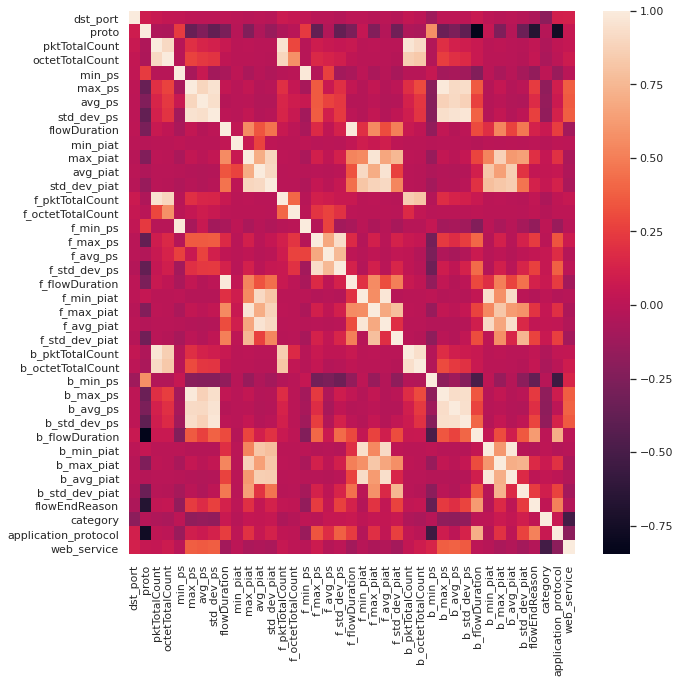

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

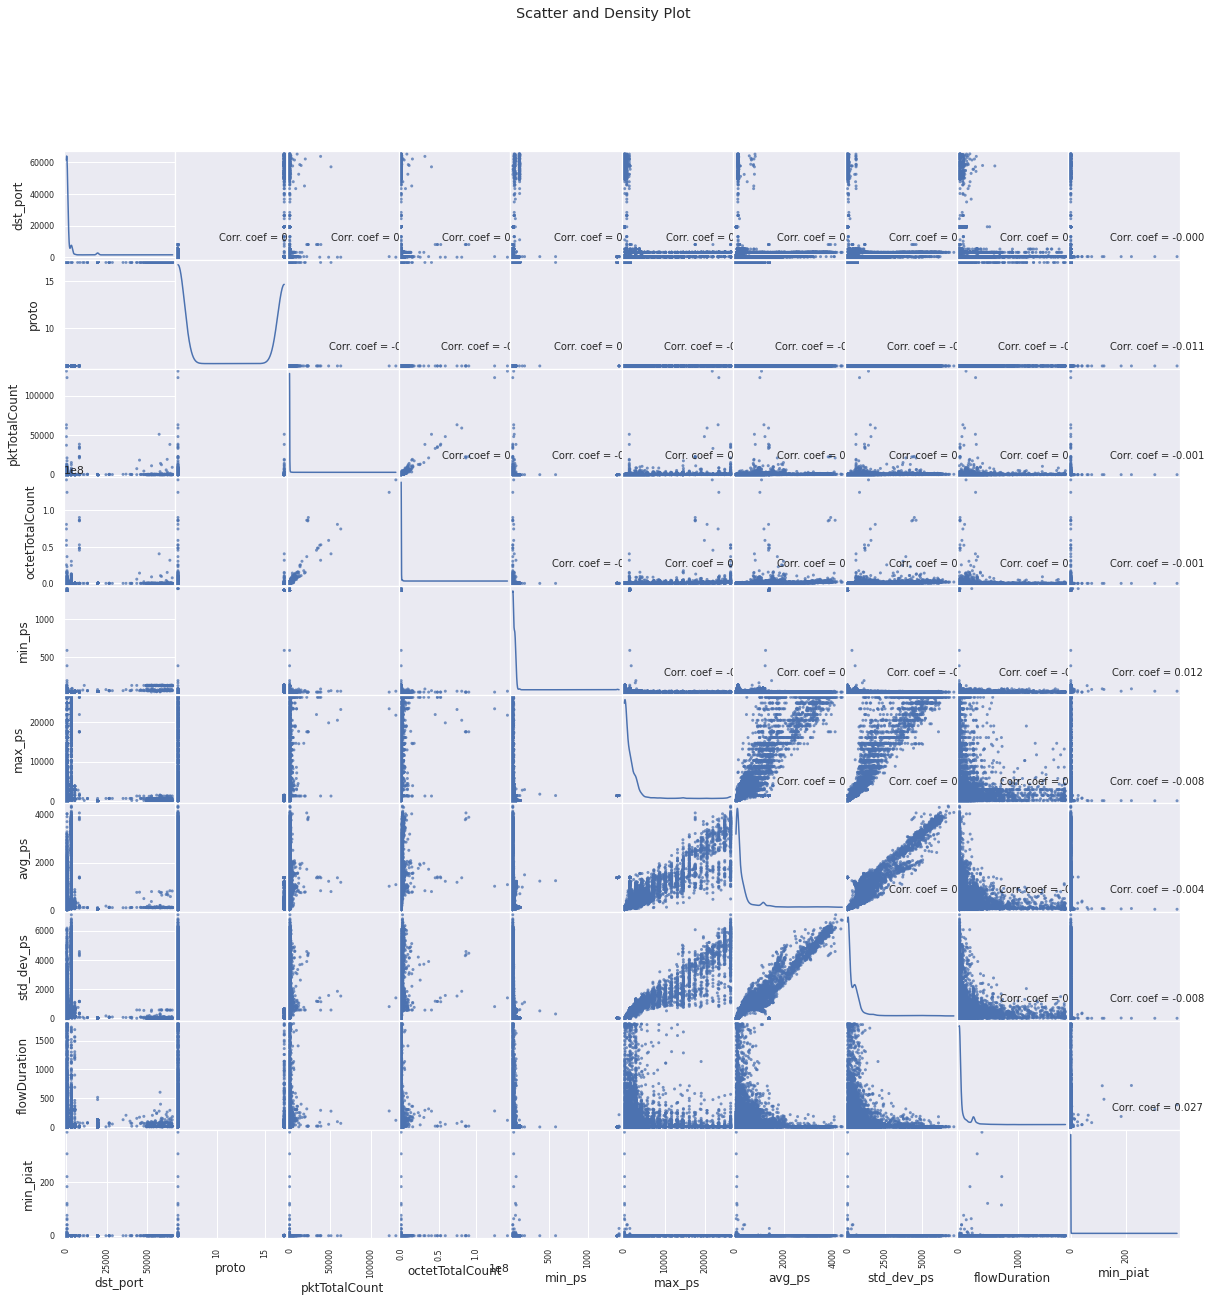

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df, 20, 10)

<ipython-input-38-d2bc342ef041>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


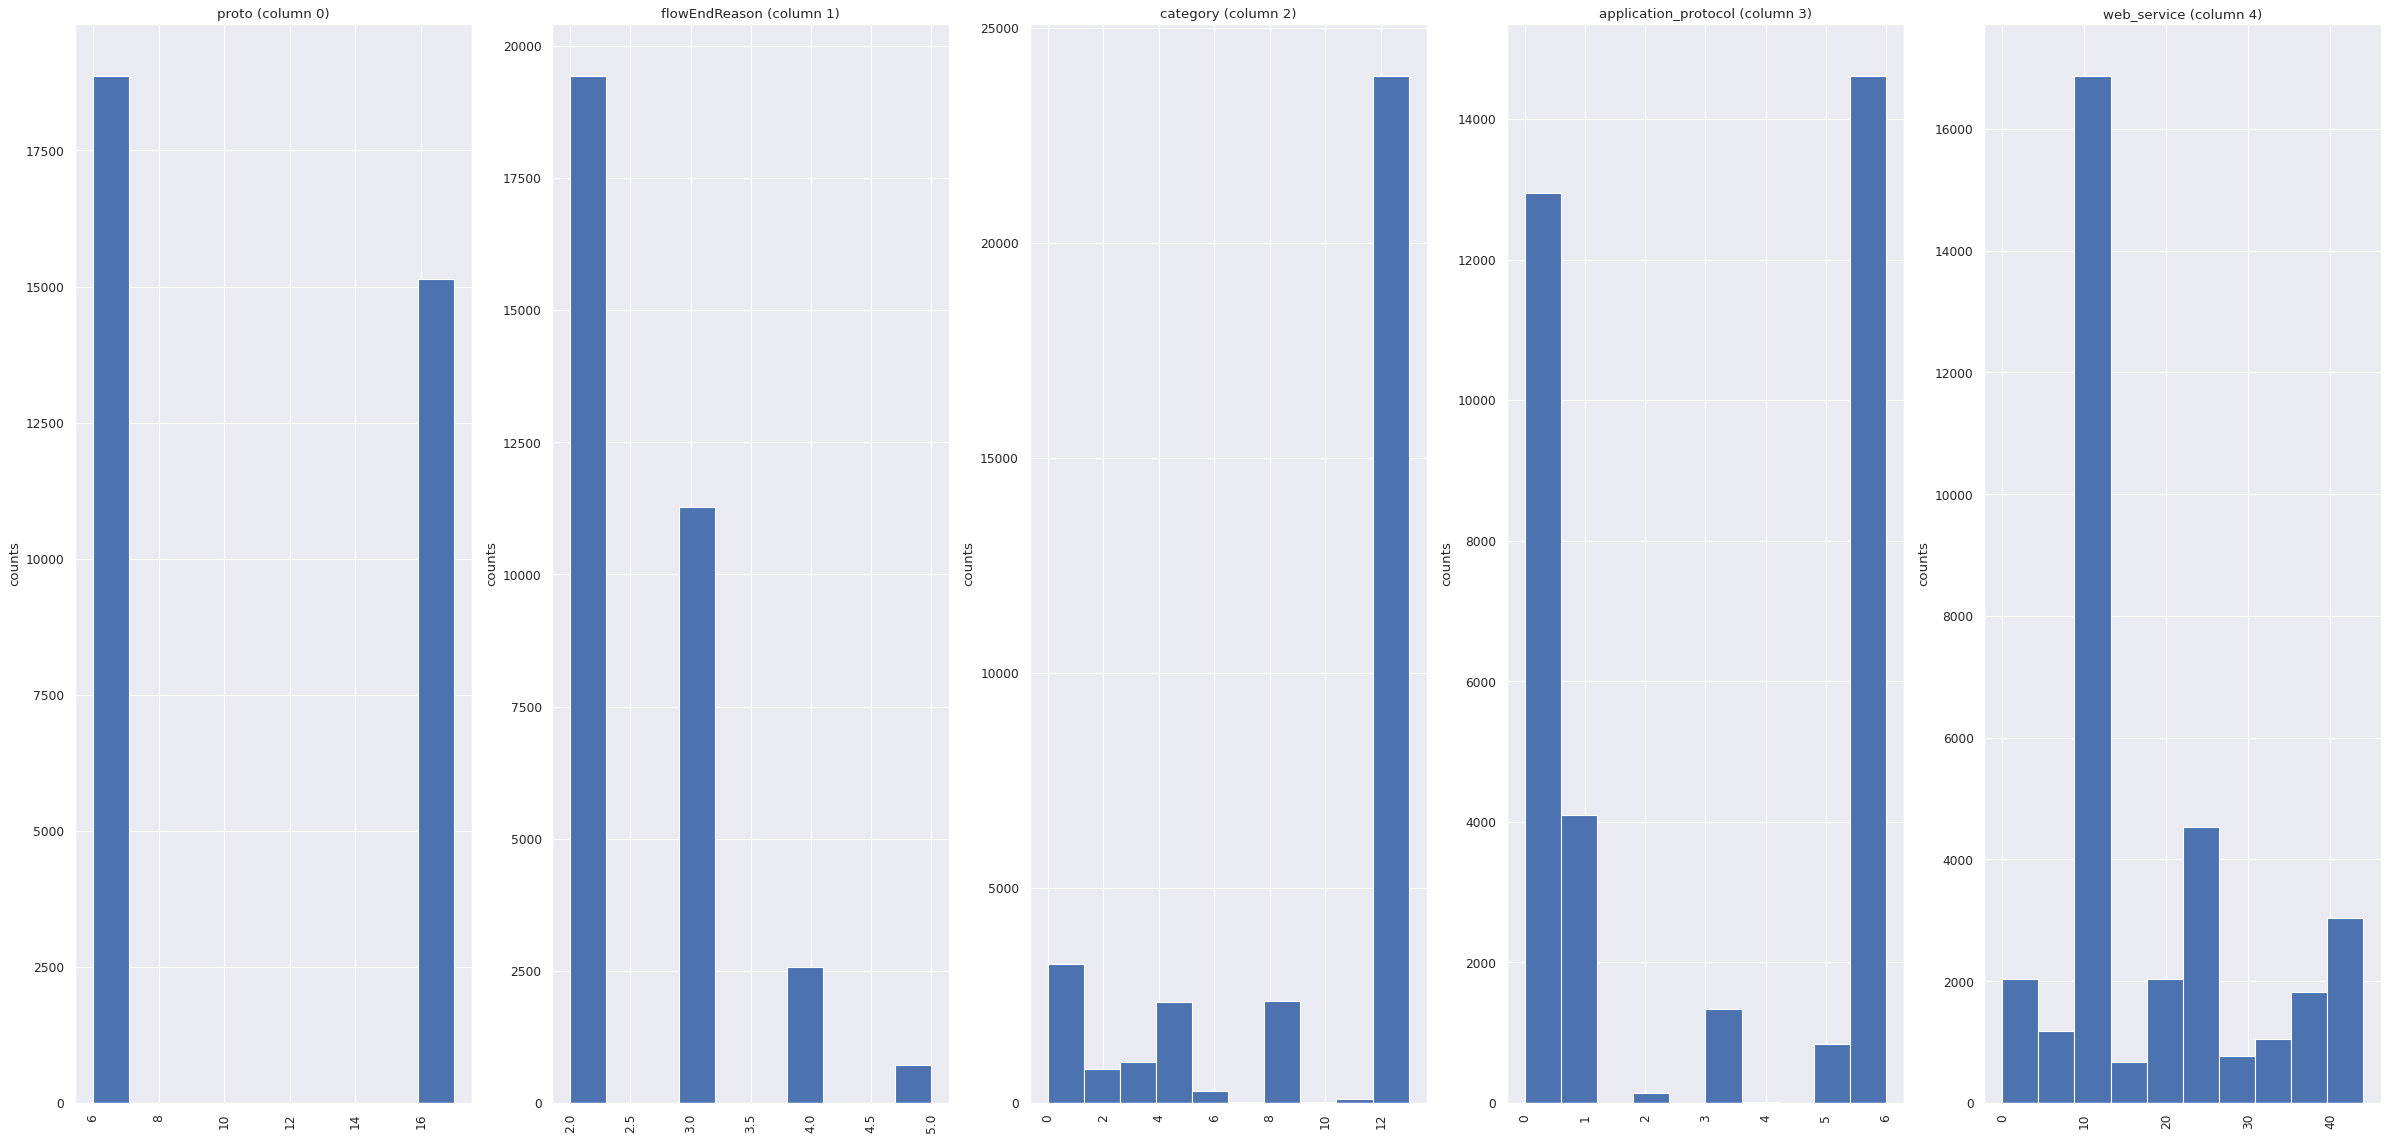

In [38]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df, 15, 5)

In [29]:
df=df_save
df["web_service"].isnull().sum()

0

In [30]:
web_service=df["web_service"]
dst_ip=df["dst_ip"]

In [31]:
df=df.drop(["web_service","dst_ip"],axis=1)


In [32]:
df=pd.get_dummies(df,columns=["application_protocol","category"] ,drop_first=True)

In [33]:
df

,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,min_piat,...,category_Music,category_Network,category_Shopping,category_SocialNetwork,category_SoftwareUpdate,category_Streaming,category_VPN,category_Video,category_VoIP,category_Web
485820,443.0,6,16,7060,40,1500,441.250000,611.498840,0.181999,1.001358e-05,...,0,0,0,0,0,0,0,0,0,1
757563,443.0,6,35,8698,40,1458,248.514282,395.435913,55.091980,3.099442e-06,...,0,0,0,0,0,0,0,0,0,1
1438482,443.0,6,30,9299,40,1459,309.966675,459.426849,16.543188,9.536743e-07,...,0,0,0,0,0,0,0,0,0,1
2002089,53.0,17,2,162,73,89,81.000000,8.000000,0.000601,6.010532e-04,...,0,0,0,0,0,0,0,0,0,1
975832,443.0,6,6,456,40,232,76.000000,69.971420,20.012682,1.001358e-04,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229316,80.0,6,40,82793,40,8728,2069.824951,2606.915283,15.046999,1.907349e-06,...,0,0,0,0,0,0,0,0,0,1
1808358,53.0,17,2,181,68,113,90.500000,22.500000,0.000827,8.270741e-04,...,0,0,0,0,0,0,0,0,0,0
1225608,443.0,6,77,57543,40,2876,747.311707,770.790466,13.727737,2.145767e-06,...,0,0,0,0,0,0,0,0,0,1
1833514,53.0,17,2,138,61,77,69.000000,8.000000,0.000769,7.691383e-04,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_col=df.columns
df=pd.DataFrame(zscore(df),columns=df_col)
df

,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,min_piat,...,category_Music,category_Network,category_Shopping,category_SocialNetwork,category_SoftwareUpdate,category_Streaming,category_VPN,category_Video,category_VoIP,category_Web
0,-0.055167,-0.837790,-0.025925,-0.025855,-0.269384,-0.010507,0.501510,0.518066,-0.360296,-0.019927,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
1,-0.055167,-0.837790,-0.020269,-0.025511,-0.269384,-0.023683,-0.037547,0.117161,0.002859,-0.019928,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
2,-0.055167,-0.837790,-0.021758,-0.025385,-0.269384,-0.023369,0.134328,0.235896,-0.252089,-0.019928,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
3,-0.210028,1.193617,-0.030092,-0.027303,0.286334,-0.453159,-0.506063,-0.601725,-0.361496,-0.019856,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
4,-0.055167,-0.837790,-0.028901,-0.027241,-0.269384,-0.408298,-0.520047,-0.486738,-0.229143,-0.019916,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825768,-0.199307,-0.837790,-0.018781,-0.009957,-0.269384,2.257028,5.056426,4.220558,-0.261985,-0.019928,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
825769,-0.210028,1.193617,-0.030092,-0.027299,0.202134,-0.445630,-0.479493,-0.574821,-0.361494,-0.019828,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677
825770,-0.055167,-0.837790,-0.007768,-0.015257,-0.269384,0.421166,1.357526,0.813631,-0.270710,-0.019928,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553
825771,-0.210028,1.193617,-0.030092,-0.027308,0.084255,-0.456924,-0.539625,-0.601725,-0.361495,-0.019835,...,-0.049704,-0.016908,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553


In [35]:
df_save=df
df_save_v2=df
web_service=pd.DataFrame(web_service).reset_index()
web_service=web_service.drop(["index"],axis=1)
df_save=df_save.reset_index()
df_save=df_save.drop(["index"],axis=1)

In [37]:
df=df_save
pca = PCA(n_components=10)
p=pca.fit_transform(df)
df=pd.DataFrame(p)

In [38]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.434591,1.545330,-0.555225,0.415061,-0.377261,-1.048813,-0.481005,0.262010,-0.962546,-0.088985
1,1.298863,0.375345,-0.490222,1.157167,0.473706,-0.253637,-0.347806,0.468389,-0.323375,-0.117533
2,0.894461,1.201163,-0.631061,1.076828,0.675449,-1.042882,-0.495009,0.618104,-0.488273,-0.046262
3,-2.463747,-1.370917,0.588745,-0.771531,0.072353,0.766099,-0.371135,0.378867,-0.450572,0.011295
4,0.240397,-0.169267,-0.513576,1.838961,-0.488179,-1.193498,-0.466547,-0.027413,-1.167863,-0.291471
...,...,...,...,...,...,...,...,...,...,...
825768,3.829876,6.424283,-0.605422,-4.922279,-1.691080,1.369847,-0.367721,0.696262,-2.176610,-0.010919
825769,-2.499981,-1.277501,0.614367,-0.979060,-0.360201,0.541644,0.069823,-0.153055,0.801932,0.017620
825770,1.114378,2.035740,-0.520438,-0.182484,-0.625735,-0.583657,-0.460284,0.144492,-0.979985,-0.142156
825771,-2.432526,-1.360831,0.562927,-0.675858,-0.050447,0.694319,-0.392977,0.555637,-0.394353,0.020471


In [39]:
df["web_service"]=web_service
df["web_service"].isnull().sum()

0

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,web_service
0,0.434591,1.545330,-0.555225,0.415061,-0.377261,-1.048813,-0.481005,0.262010,-0.962546,-0.088985,Amazon
1,1.298863,0.375345,-0.490222,1.157167,0.473706,-0.253637,-0.347806,0.468389,-0.323375,-0.117533,Google
2,0.894461,1.201163,-0.631061,1.076828,0.675449,-1.042882,-0.495009,0.618104,-0.488273,-0.046262,Google
3,-2.463747,-1.370917,0.588745,-0.771531,0.072353,0.766099,-0.371135,0.378867,-0.450572,0.011295,Google
4,0.240397,-0.169267,-0.513576,1.838961,-0.488179,-1.193498,-0.466547,-0.027413,-1.167863,-0.291471,Microsoft
...,...,...,...,...,...,...,...,...,...,...,...
825768,3.829876,6.424283,-0.605422,-4.922279,-1.691080,1.369847,-0.367721,0.696262,-2.176610,-0.010919,Microsoft
825769,-2.499981,-1.277501,0.614367,-0.979060,-0.360201,0.541644,0.069823,-0.153055,0.801932,0.017620,Messenger
825770,1.114378,2.035740,-0.520438,-0.182484,-0.625735,-0.583657,-0.460284,0.144492,-0.979985,-0.142156,Google
825771,-2.432526,-1.360831,0.562927,-0.675858,-0.050447,0.694319,-0.392977,0.555637,-0.394353,0.020471,Google


In [41]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=7)


In [42]:
x_train= df_train.drop(["web_service"],axis=1)
y_train=df_train["web_service"]
x_test= df_test.drop(["web_service"],axis=1)
y_test=df_test["web_service"]

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 64), max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 64), max_iter=1000)

In [44]:
predictions = mlp.predict(x_test)

In [45]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[5328    0   36 ...   10    0    0]
 [   0  568    0 ...    0    0    0]
 [  92    0  308 ...    7    0    0]
 ...
 [  91    0    4 ...   77    0    0]
 [   0    0    0 ...    0 6763    0]
 [   0    0    0 ...    0    0   25]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.66      0.53      0.59     10044
     AmazonVideo       0.91      0.94      0.92       606
           Apple       0.65      0.29      0.41      1045
       ApplePush       0.85      0.90      0.87       112
      AppleStore       0.85      0.71      0.77        31
     AppleiCloud       0.59      0.63      0.61       326
     AppleiTunes       1.00      1.00      1.00       108
             CNN       0.00      0.00      0.00         4
      Cloudflare       0.69      0.21      0.33      2035
          Deezer       0.00      0.00      0.00         3
         Dropbox       0.89      0.95      0.92      2346
        Facebook       0.96      0.94      0.95     14447
           GMail       0.99      0.98      0.99      2620
          Github       0.77      0.60      0.67       782
          Google       0.84      0.90      0.87     65116
      GoogleDocs       0.82      0.82      0.82       672
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [47]:
predictions = model.predict(x_test)

In [48]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6329    0   39 ...    9    0    0]
 [   0  574    0 ...    0    0    0]
 [  71    0  612 ...    1    0    0]
 ...
 [  54    0    2 ...  309    0    0]
 [   0    0    0 ...    0 6724    0]
 [   0    0    0 ...    0    0   25]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.76      0.63      0.69     10044
     AmazonVideo       0.94      0.95      0.94       606
           Apple       0.80      0.59      0.68      1045
       ApplePush       0.99      0.90      0.94       112
      AppleStore       0.91      0.68      0.78        31
     AppleiCloud       0.86      0.63      0.73       326
     AppleiTunes       1.00      1.00      1.00       108
             CNN       1.00      0.25      0.40         4
      Cloudflare       0.74      0.35      0.48      2035
          Deezer       0.00      0.00      0.00         3
         Dropbox       0.91      0.96      0.93      2346
        Facebook       0.97      0.98      0.98     14447
           GMail       0.94      0.98      0.96      2620
          Github       0.83      0.80      0.82       782
          Google       0.87      0.96      0.91     65116
      GoogleDocs       0.89      0.80      0.84       672
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
model=DecisionTreeClassifier(criterion="entropy").fit(x_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [50]:
predictions = model.predict(x_test)

In [51]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6036    0   60 ...   71    0    0]
 [   0  560    0 ...    0    3    0]
 [  85    0  607 ...    6    0    0]
 ...
 [  54    0    3 ...  310    0    0]
 [   1    0    0 ...    0 6618    0]
 [   0    0    0 ...    0    0   24]]
                  precision    recall  f1-score   support

          Amazon       0.63      0.60      0.61     10044
     AmazonVideo       0.92      0.92      0.92       606
           Apple       0.64      0.58      0.61      1045
       ApplePush       0.88      0.92      0.90       112
      AppleStore       0.71      0.77      0.74        31
     AppleiCloud       0.61      0.60      0.61       326
     AppleiTunes       0.99      0.98      0.99       108
             CNN       0.20      0.25      0.22         4
      Cloudflare       0.40      0.36      0.38      2035
          Deezer       0.00      0.00      0.00         3
         Dropbox       0.90      0.91      0.91      2346
        Facebook       0.96      0.97      0.97     14447
           GMail 

In [53]:
# mlp_ = MLPClassifier(hidden_layer_sizes=(100, 100, 64), max_iter=1000)
# mlp_.fit(x_train, y_train)
# predictions = mlp_.predict(x_test)
# print(confusion_matrix(y_test,predictions))
# print(classification_report(y_test,predictions))

In [36]:
df_save=df

In [37]:
df=df_save_v2

df["web_service"]=web_service
df["web_service"].isnull().sum()

0

In [38]:
import ipaddress
addr = list()
for i in dst_ip:
    addr.append(int(ipaddress.IPv4Address(i)))
df['dst-ip-int'] = addr
df['dst-ip-int'] = (df['dst-ip-int'] - df['dst-ip-int'].min()) / (df['dst-ip-int'].max() - df['dst-ip-int'].min())
df

,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,min_piat,...,category_Shopping,category_SocialNetwork,category_SoftwareUpdate,category_Streaming,category_VPN,category_Video,category_VoIP,category_Web,web_service,dst-ip-int
0,-0.055167,-0.837790,-0.025925,-0.025855,-0.269384,-0.010507,0.501510,0.518066,-0.360296,-0.019927,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Amazon,0.053371
1,-0.055167,-0.837790,-0.020269,-0.025511,-0.269384,-0.023683,-0.037547,0.117161,0.002859,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,0.773718
2,-0.055167,-0.837790,-0.021758,-0.025385,-0.269384,-0.023369,0.134328,0.235896,-0.252089,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,0.773719
3,-0.210028,1.193617,-0.030092,-0.027303,0.286334,-0.453159,-0.506063,-0.601725,-0.361496,-0.019856,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,0.770195
4,-0.055167,-0.837790,-0.028901,-0.027241,-0.269384,-0.408298,-0.520047,-0.486738,-0.229143,-0.019916,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Microsoft,0.288298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825768,-0.199307,-0.837790,-0.018781,-0.009957,-0.269384,2.257028,5.056426,4.220558,-0.261985,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Microsoft,0.860383
825769,-0.210028,1.193617,-0.030092,-0.027299,0.202134,-0.445630,-0.479493,-0.574821,-0.361494,-0.019828,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677,Messenger,0.770195
825770,-0.055167,-0.837790,-0.007768,-0.015257,-0.269384,0.421166,1.357526,0.813631,-0.270710,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,0.969376
825771,-0.210028,1.193617,-0.030092,-0.027308,0.084255,-0.456924,-0.539625,-0.601725,-0.361495,-0.019835,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,0.770195


In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=64, random_state=0).fit(df[['dst-ip-int']])
labels = kmeans.predict(df[['dst-ip-int']])
labels[:10]

array([62, 22, 22, 11, 10, 22, 22, 22, 14, 11])

In [40]:
df['dst_ip_cluster'] = labels
df= df.drop(["dst-ip-int"],axis=1)
df

,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,min_piat,...,category_Shopping,category_SocialNetwork,category_SoftwareUpdate,category_Streaming,category_VPN,category_Video,category_VoIP,category_Web,web_service,dst_ip_cluster
0,-0.055167,-0.837790,-0.025925,-0.025855,-0.269384,-0.010507,0.501510,0.518066,-0.360296,-0.019927,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Amazon,62
1,-0.055167,-0.837790,-0.020269,-0.025511,-0.269384,-0.023683,-0.037547,0.117161,0.002859,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,22
2,-0.055167,-0.837790,-0.021758,-0.025385,-0.269384,-0.023369,0.134328,0.235896,-0.252089,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,22
3,-0.210028,1.193617,-0.030092,-0.027303,0.286334,-0.453159,-0.506063,-0.601725,-0.361496,-0.019856,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,11
4,-0.055167,-0.837790,-0.028901,-0.027241,-0.269384,-0.408298,-0.520047,-0.486738,-0.229143,-0.019916,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Microsoft,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825768,-0.199307,-0.837790,-0.018781,-0.009957,-0.269384,2.257028,5.056426,4.220558,-0.261985,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Microsoft,9
825769,-0.210028,1.193617,-0.030092,-0.027299,0.202134,-0.445630,-0.479493,-0.574821,-0.361494,-0.019828,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677,Messenger,11
825770,-0.055167,-0.837790,-0.007768,-0.015257,-0.269384,0.421166,1.357526,0.813631,-0.270710,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,4
825771,-0.210028,1.193617,-0.030092,-0.027308,0.084255,-0.456924,-0.539625,-0.601725,-0.361495,-0.019835,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,11


In [41]:

need_to_resample=[("AmazonVideo",5000),("Apple",3000),("ApplePush",8000),("AppleStore",8000),
                 ("AppleiCloud",8000),("AppleiTunes",8000),("CNN",8000),("Cloudflare",3000),
                 ("Deezer",8000),("Dropbox",3000),("GMail",3000),("Github",5000),("GoogleDocs",5000),
                 ("GoogleDrive",5000),("GoogleHangoutDuo",5000),("GoogleMaps",8000),("GooglePlus",8000),
                 ("IMAPS",8000),("Instagram",5000),("LinkedIn",8000),("MSN",3000),("MS_OneDrive",8000),
                 ("NetFlix",8000),("Ookla",8000),("PS_VUE",8000),("PlayStore",5000),("Playstation",8000),
                 ("QQ",8000),("Signal",5000),("Skype",3000),("SkypeCall",8000),("Slack",8000),("Snapchat",8000),
                 ("SoundCloud",8000),("Spotify",8000),("Starcraft",8000),("Steam",8000),("Telegram",8000),
                 ("TikTok",8000),("Tuenti",8000),("Twitch",8000),("Twitter",3000),("UbuntuONE",3000),("Waze",8000),
                 ("WeChat",8000),("Webex",8000),("WhatsAppCall",5000),("Wikipedia",8000),("WindowsUpdate",3000),
                 ("Xbox",8000),("Yahoo",5000),("eBay",8000)]
for smp in need_to_resample:
    to_resample=df.loc[df["web_service"]==smp[0]]
    our_sample=to_resample.sample(n=int(smp[1]),replace=True)
    df=pd.concat([df,our_sample])

In [42]:
df

,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowDuration,min_piat,...,category_Shopping,category_SocialNetwork,category_SoftwareUpdate,category_Streaming,category_VPN,category_Video,category_VoIP,category_Web,web_service,dst_ip_cluster
0,-0.055167,-0.837790,-0.025925,-0.025855,-0.269384,-0.010507,0.501510,0.518066,-0.360296,-0.019927,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Amazon,62
1,-0.055167,-0.837790,-0.020269,-0.025511,-0.269384,-0.023683,-0.037547,0.117161,0.002859,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,22
2,-0.055167,-0.837790,-0.021758,-0.025385,-0.269384,-0.023369,0.134328,0.235896,-0.252089,-0.019928,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,22
3,-0.210028,1.193617,-0.030092,-0.027303,0.286334,-0.453159,-0.506063,-0.601725,-0.361496,-0.019856,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Google,11
4,-0.055167,-0.837790,-0.028901,-0.027241,-0.269384,-0.408298,-0.520047,-0.486738,-0.229143,-0.019916,...,-0.013207,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,0.685553,Microsoft,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155828,-0.210028,1.193617,-0.030092,-0.027304,0.050575,-0.450963,-0.515852,-0.582243,-0.360682,-0.004993,...,75.720108,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677,eBay,11
42901,-0.210028,1.193617,-0.030092,-0.027294,0.202134,-0.438728,-0.448727,-0.554410,-0.360339,0.001269,...,75.720108,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677,eBay,11
719703,-0.210028,1.193617,-0.030092,-0.027291,0.101095,-0.432140,-0.427751,-0.529361,-0.361086,-0.012379,...,75.720108,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677,eBay,11
86690,-0.055167,-0.837790,-0.025032,-0.025888,-0.269384,-0.016781,0.283244,0.304676,-0.301741,-0.019928,...,75.720108,-0.35063,-0.110386,-0.022665,-0.001556,-0.075796,-0.13219,-1.458677,eBay,46


In [43]:
web_service_v2=df["web_service"]
df=df.drop(["web_service"],axis=1)

In [44]:
df_save_v3=df

In [45]:
df=df_save_v3
pca = PCA(n_components=10)
p=pca.fit_transform(df)
df=pd.DataFrame(p)

In [46]:
df

,0,1,2,3,4,5,6,7,8,9
0,44.069272,2.361637,-1.186430,-4.163791,-1.084569,-0.667026,-0.329288,0.132113,-3.192625,-1.118715
1,4.487283,-0.376147,-0.571173,-0.994676,-0.516001,-0.837610,-0.439478,0.962197,0.236919,-0.501214
2,4.499377,-0.380056,-0.578586,-1.023279,-0.472542,-0.827905,-0.398580,0.866174,-0.320706,0.136416
3,-6.725250,-1.159371,-0.359169,0.390541,-0.366804,-0.509863,-0.310919,-1.060839,-1.512125,-0.861422
4,-7.467576,-1.193197,-0.385486,-0.001424,-0.376574,-0.800097,-0.407130,0.480440,0.188596,-0.442466
...,...,...,...,...,...,...,...,...,...,...
1166768,-5.163208,-1.233314,75.268475,3.519622,0.959901,0.536390,0.236108,-1.356330,-1.064611,0.458705
1166769,-5.166503,-1.234788,75.270371,3.572111,0.969245,0.545899,0.249106,-1.397387,-1.090318,0.477224
1166770,-5.171182,-1.235591,75.273373,3.560817,0.969828,0.550067,0.255778,-1.415138,-1.099558,0.487069
1166771,29.825505,1.191018,74.681101,0.268658,0.509080,0.289944,0.180737,0.196877,-1.517200,0.647416


In [47]:
web_service_v2

0            Amazon
1            Google
2            Google
3            Google
4         Microsoft
            ...    
155828         eBay
42901          eBay
719703         eBay
86690          eBay
43929          eBay
Name: web_service, Length: 1166773, dtype: object

In [48]:
web_service_v2=pd.DataFrame(web_service_v2).reset_index()
web_service_v2=web_service_v2.drop(["index"],axis=1)
df=df.reset_index()
df=df.drop(["index"],axis=1)
df["web_service"]=web_service_v2
df["web_service"].isnull().sum()

0

In [49]:
df

,0,1,2,3,4,5,6,7,8,9,web_service
0,44.069272,2.361637,-1.186430,-4.163791,-1.084569,-0.667026,-0.329288,0.132113,-3.192625,-1.118715,Amazon
1,4.487283,-0.376147,-0.571173,-0.994676,-0.516001,-0.837610,-0.439478,0.962197,0.236919,-0.501214,Google
2,4.499377,-0.380056,-0.578586,-1.023279,-0.472542,-0.827905,-0.398580,0.866174,-0.320706,0.136416,Google
3,-6.725250,-1.159371,-0.359169,0.390541,-0.366804,-0.509863,-0.310919,-1.060839,-1.512125,-0.861422,Google
4,-7.467576,-1.193197,-0.385486,-0.001424,-0.376574,-0.800097,-0.407130,0.480440,0.188596,-0.442466,Microsoft
...,...,...,...,...,...,...,...,...,...,...,...
1166768,-5.163208,-1.233314,75.268475,3.519622,0.959901,0.536390,0.236108,-1.356330,-1.064611,0.458705,eBay
1166769,-5.166503,-1.234788,75.270371,3.572111,0.969245,0.545899,0.249106,-1.397387,-1.090318,0.477224,eBay
1166770,-5.171182,-1.235591,75.273373,3.560817,0.969828,0.550067,0.255778,-1.415138,-1.099558,0.487069,eBay
1166771,29.825505,1.191018,74.681101,0.268658,0.509080,0.289944,0.180737,0.196877,-1.517200,0.647416,eBay


In [50]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=7)


In [51]:
x_train= df_train.drop(["web_service"],axis=1)
y_train=df_train["web_service"]
x_test= df_test.drop(["web_service"],axis=1)
y_test=df_test["web_service"]

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 64), max_iter=1000)
mlp.fit(x_train, y_train)

In [53]:
predictions = mlp.predict(x_test)

In [54]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9056    0   31 ...   51    0    0]
 [   2 1588    0 ...    0    0    0]
 [  34    0 1064 ...   20    0    0]
 ...
 [ 123    0   49 ...  915    0    0]
 [   0    0    0 ...    0 6787    0]
 [   0    0    0 ...    0    0 1605]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.87      0.89      0.88     10145
     AmazonVideo       0.92      0.96      0.94      1658
           Apple       0.63      0.64      0.64      1656
       ApplePush       0.96      0.99      0.98      1749
      AppleStore       0.98      1.00      0.99      1578
     AppleiCloud       0.87      0.83      0.85      1986
     AppleiTunes       1.00      1.00      1.00      1656
             CNN       0.90      0.78      0.84      1581
      Cloudflare       0.92      0.95      0.93      2668
          Deezer       0.98      0.64      0.77      1653
         Dropbox       0.92      0.87      0.89      3006
        Facebook       0.86      0.97      0.91     14288
           GMail       0.89      0.94      0.91      3094
          Github       0.95      0.81      0.88      1850
          Google       0.84      0.97      0.90     64903
      GoogleDocs       0.84      0.87      0.85      1666
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [56]:
predictions = model.predict(x_test)

In [57]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9546    1    8 ...   13    0    0]
 [   0 1656    0 ...    0    0    0]
 [  10    0 1534 ...    1    0    0]
 ...
 [  10    0    1 ... 1496    0    0]
 [   0    0    0 ...    0 6782    0]
 [   0    0    0 ...    0    0 1605]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.96      0.94      0.95     10145
     AmazonVideo       1.00      1.00      1.00      1658
           Apple       0.97      0.93      0.95      1656
       ApplePush       0.99      1.00      1.00      1749
      AppleStore       1.00      1.00      1.00      1578
     AppleiCloud       0.98      0.99      0.98      1986
     AppleiTunes       1.00      1.00      1.00      1656
             CNN       1.00      0.96      0.98      1581
      Cloudflare       0.96      0.99      0.97      2668
          Deezer       1.00      1.00      1.00      1653
         Dropbox       1.00      0.98      0.99      3006
        Facebook       0.99      0.98      0.98     14288
           GMail       0.97      0.96      0.97      3094
          Github       0.99      0.98      0.98      1850
          Google       0.92      0.97      0.94     64903
      GoogleDocs       0.97      0.99      0.98      1666
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
model=DecisionTreeClassifier(criterion="entropy").fit(x_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [59]:
predictions = model.predict(x_test)

In [60]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9405    6   16 ...   27    0    0]
 [   1 1651    0 ...    0    0    0]
 [  16    0 1524 ...    2    0    0]
 ...
 [   6    0    1 ... 1497    0    0]
 [   0    0    0 ...    0 6654    0]
 [   0    0    0 ...    0    0 1605]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.94      0.93      0.94     10145
     AmazonVideo       1.00      1.00      1.00      1658
           Apple       0.93      0.92      0.93      1656
       ApplePush       0.99      1.00      1.00      1749
      AppleStore       0.99      1.00      1.00      1578
     AppleiCloud       0.98      0.99      0.98      1986
     AppleiTunes       1.00      1.00      1.00      1656
             CNN       1.00      0.96      0.98      1581
      Cloudflare       0.96      0.97      0.96      2668
          Deezer       1.00      1.00      1.00      1653
         Dropbox       0.98      0.97      0.98      3006
        Facebook       0.98      0.97      0.98     14288
           GMail       0.94      0.93      0.93      3094
          Github       0.98      0.98      0.98      1850
          Google       0.92      0.93      0.92     64903
      GoogleDocs       0.94      0.98      0.96      1666
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
mlp_ = MLPClassifier(hidden_layer_sizes=(100, 100, 64), max_iter=1000)
mlp_.fit(x_train, y_train)
predictions = mlp_.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[8769    0   21 ...   82    0    0]
 [   0 1609    0 ...    0    0    0]
 [  13    0  764 ...   18    0    0]
 ...
 [  41    0    4 ...  700    0    0]
 [   0    0    0 ...    0 6743    0]
 [   0    0    0 ...    0    0 1605]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.92      0.86      0.89     10145
     AmazonVideo       0.94      0.97      0.95      1658
           Apple       0.91      0.46      0.61      1656
       ApplePush       0.97      0.97      0.97      1749
      AppleStore       0.98      1.00      0.99      1578
     AppleiCloud       0.87      0.86      0.86      1986
     AppleiTunes       1.00      1.00      1.00      1656
             CNN       0.96      0.77      0.85      1581
      Cloudflare       0.97      0.87      0.92      2668
          Deezer       0.98      0.94      0.96      1653
         Dropbox       0.96      0.93      0.94      3006
        Facebook       0.93      0.90      0.91     14288
           GMail       0.93      0.93      0.93      3094
          Github       0.86      0.91      0.89      1850
          Google       0.87      0.94      0.90     64903
      GoogleDocs       0.88      0.81      0.84      1666
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#### dst-ip clustering
import ipaddress
addr = list()
for i in dst_ip:
    addr.append(int(ipaddress.IPv4Address(i)))
df['dst-ip-int'] = addr
df['dst-ip-int'] = (df['dst-ip-int'] - df['dst-ip-int'].min()) / (df['dst-ip-int'].max() - df['dst-ip-int'].min())
df

,0,1,2,3,4,5,6,7,8,9,web_service,dst-ip-int
0,0.434591,1.545330,-0.555225,0.415061,-0.377261,-1.048813,-0.481005,0.262010,-0.962546,-0.088985,Amazon,0.053371
1,1.298863,0.375345,-0.490222,1.157167,0.473706,-0.253637,-0.347806,0.468389,-0.323375,-0.117533,Google,0.773718
2,0.894461,1.201163,-0.631061,1.076828,0.675449,-1.042882,-0.495009,0.618104,-0.488273,-0.046262,Google,0.773719
3,-2.463747,-1.370917,0.588745,-0.771531,0.072353,0.766099,-0.371135,0.378867,-0.450572,0.011295,Google,0.770195
4,0.240397,-0.169267,-0.513576,1.838961,-0.488179,-1.193498,-0.466547,-0.027413,-1.167863,-0.291471,Microsoft,0.288298
...,...,...,...,...,...,...,...,...,...,...,...,...
825768,3.829876,6.424283,-0.605422,-4.922279,-1.691080,1.369847,-0.367721,0.696262,-2.176610,-0.010919,Microsoft,0.860383
825769,-2.499981,-1.277501,0.614367,-0.979060,-0.360201,0.541644,0.069823,-0.153055,0.801932,0.017620,Messenger,0.770195
825770,1.114378,2.035740,-0.520438,-0.182484,-0.625735,-0.583657,-0.460284,0.144492,-0.979985,-0.142156,Google,0.969376
825771,-2.432526,-1.360831,0.562927,-0.675858,-0.050447,0.694319,-0.392977,0.555637,-0.394353,0.020471,Google,0.770195


In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=64, random_state=0).fit(df[['dst-ip-int']])
labels = kmeans.predict(df[['dst-ip-int']])
labels[:10]

array([62, 22, 22, 11, 10, 22, 22, 22, 14, 11])

In [56]:
df['dst_ip_cluster'] = labels
df= df.drop(["dst-ip-int"],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,web_service,dst_ip_cluster
0,0.434591,1.545330,-0.555225,0.415061,-0.377261,-1.048813,-0.481005,0.262010,-0.962546,-0.088985,Amazon,62
1,1.298863,0.375345,-0.490222,1.157167,0.473706,-0.253637,-0.347806,0.468389,-0.323375,-0.117533,Google,22
2,0.894461,1.201163,-0.631061,1.076828,0.675449,-1.042882,-0.495009,0.618104,-0.488273,-0.046262,Google,22
3,-2.463747,-1.370917,0.588745,-0.771531,0.072353,0.766099,-0.371135,0.378867,-0.450572,0.011295,Google,11
4,0.240397,-0.169267,-0.513576,1.838961,-0.488179,-1.193498,-0.466547,-0.027413,-1.167863,-0.291471,Microsoft,10
...,...,...,...,...,...,...,...,...,...,...,...,...
825768,3.829876,6.424283,-0.605422,-4.922279,-1.691080,1.369847,-0.367721,0.696262,-2.176610,-0.010919,Microsoft,9
825769,-2.499981,-1.277501,0.614367,-0.979060,-0.360201,0.541644,0.069823,-0.153055,0.801932,0.017620,Messenger,11
825770,1.114378,2.035740,-0.520438,-0.182484,-0.625735,-0.583657,-0.460284,0.144492,-0.979985,-0.142156,Google,4
825771,-2.432526,-1.360831,0.562927,-0.675858,-0.050447,0.694319,-0.392977,0.555637,-0.394353,0.020471,Google,11


In [57]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=7)
x_train= df_train.drop(["web_service"],axis=1)
y_train=df_train["web_service"]
x_test= df_test.drop(["web_service"],axis=1)
y_test=df_test["web_service"]

In [58]:
model=DecisionTreeClassifier(criterion="entropy").fit(x_train, y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9432    2   13 ...   22    0    0]
 [   2  579    0 ...    0    0    0]
 [  15    0  865 ...    2    0    0]
 ...
 [  27    0    8 ...  443    1    0]
 [   1    1    0 ...    0 6657    0]
 [   0    0    0 ...    0    0   23]]
                  precision    recall  f1-score   support

          Amazon       0.94      0.94      0.94     10044
     AmazonVideo       0.94      0.96      0.95       606
           Apple       0.87      0.83      0.85      1045
       ApplePush       0.93      0.94      0.93       112
      AppleStore       0.77      0.77      0.77        31
     AppleiCloud       0.83      0.88      0.86       326
     AppleiTunes       1.00      0.94      0.97       108
             CNN       0.25      0.25      0.25         4
      Cloudflare       0.96      0.94      0.95      2035
          Deezer       0.00      0.00      0.00         3
         Dropbox       0.97      0.98      0.98      2346
        Facebook       0.98      0.98      0.98     14447
           GMail 

In [59]:
mlp_ = MLPClassifier(hidden_layer_sizes=(50, 50, 64), max_iter=1000)
mlp_.fit(x_train, y_train)
predictions = mlp_.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9056    0    8 ...   22    0    0]
 [   0  584    0 ...    0    1    0]
 [  30    0  648 ...    9    0    0]
 ...
 [  52    0    1 ...  188    0    0]
 [   0    0    0 ...    0 6738    0]
 [   0    0    0 ...    0    0   24]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.90      0.90      0.90     10044
     AmazonVideo       0.93      0.96      0.95       606
           Apple       0.84      0.62      0.71      1045
       ApplePush       0.88      0.89      0.88       112
      AppleStore       0.52      0.71      0.60        31
     AppleiCloud       0.79      0.66      0.72       326
     AppleiTunes       1.00      1.00      1.00       108
             CNN       0.00      0.00      0.00         4
      Cloudflare       0.95      0.94      0.94      2035
          Deezer       0.00      0.00      0.00         3
         Dropbox       0.96      0.95      0.96      2346
        Facebook       0.94      0.98      0.96     14447
           GMail       0.98      0.98      0.98      2620
          Github       0.89      0.88      0.89       782
          Google       0.90      0.96      0.93     65116
      GoogleDocs       0.88      0.94      0.91       672
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=0)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9596    0    4 ...    5    0    0]
 [   0  591    0 ...    0    0    0]
 [  24    0  858 ...    1    0    0]
 ...
 [  40    0    2 ...  423    0    0]
 [   0    0    0 ...    0 6735    0]
 [   0    0    0 ...    0    0   25]]


C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          Amazon       0.95      0.96      0.95     10044
     AmazonVideo       0.97      0.98      0.97       606
           Apple       0.95      0.82      0.88      1045
       ApplePush       0.98      0.94      0.96       112
      AppleStore       0.96      0.74      0.84        31
     AppleiCloud       0.89      0.90      0.89       326
     AppleiTunes       1.00      1.00      1.00       108
             CNN       0.50      0.25      0.33         4
      Cloudflare       0.97      0.96      0.96      2035
          Deezer       0.00      0.00      0.00         3
         Dropbox       0.98      0.99      0.98      2346
        Facebook       0.98      0.99      0.99     14447
           GMail       0.95      0.98      0.97      2620
          Github       0.95      0.94      0.95       782
          Google       0.92      0.98      0.95     65116
      GoogleDocs       0.95      0.89      0.92       672
     GoogleDr

C:\Users\mohammad\anaconda3\envs\DATA_MINING\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
